In [2]:
import sys
sys.path.append('./code')
from importlib import reload

In [3]:
row_colors = ['lightgreen', 'green', 'orange']

columns_to_names = {
    0 : 'Active 1',
    4 : 'Active 2',
    18 : 'Repressive',
}

row_colors_dict = {
'Active 1' : 'lightgreen',
'Active 2' : 'green',
'Repressive' : 'orange',
}

In [4]:
import make_figure4
reload(make_figure4)
from make_figure4 import *
import pickle

goodinds = pickle.load(open('./for_snipping/goodinds', 'rb'))
merged_clustdict = pickle.load(open('./for_snipping/merged_clustdict', 'rb'))
merged_inds_to_subset = pickle.load(open('./for_snipping/merged_inds_to_subset', 'rb'))


cooldict_50kb = pickle.load(open('./for_snipping/cooldict_50kb', 'rb'))
ind_to_gene = pickle.load(open('./for_snipping/ind_to_gene', 'rb'))
all_ind_to_region = pickle.load(open('./for_snipping/all_ind_to_region', 'rb'))

my_treg_comp = pickle.load(open('./for_snipping/my_treg_comp', 'rb'))



1


In [5]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [6]:
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [7]:
gene_to_ind = pickle.load(open('gene_to_ind.p', 'rb'))
gene_to_ind['Ikzf1']


[6155, 6154]

In [8]:
df = pd.DataFrame([goodinds, merged_clustdict['all']]).T
df = df[df[1].isin(merged_inds_to_subset)]
df.columns = ['ind', 'cluster']
df['chrom'] = [all_ind_to_region[x][0] for x in df['ind'].values]
df['chrom'] = 'chr' + df['chrom']


In [9]:
inter_and_intra_connections_treg = pickle.load(open('./for_snipping/inter_and_intra_connections_treg', 'rb'))
inter_and_intra_connections_tcon = pickle.load(open('./for_snipping/inter_and_intra_connections_tcon', 'rb'))

In [17]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler

hic_pref = '/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/'
active_rest_hic_dict = {
    'aLSL' : cooler.Cooler(hic_pref + 'aLSL.mcool::/resolutions/50000'),
    'rLSL' : cooler.Cooler(hic_pref + 'rLSL.mcool::/resolutions/50000'),
    'aTconv' : cooler.Cooler(hic_pref + 'aTconv.mcool::/resolutions/50000'),
    'aTreg' : cooler.Cooler(hic_pref + 'aTreg.mcool::/resolutions/50000'),
    'rTconv' : cooler.Cooler(hic_pref + 'rTconv.mcool::/resolutions/50000'),
    'rTreg' : cooler.Cooler(hic_pref + 'rTreg.mcool::/resolutions/50000'),
}

from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

megaloop_pileup_cooldict = cooldict_50kb
padding_size = 50

inter_all_mat_dict, inter_all_metadata = pileup_bins_with_hub(df, active_rest_hic_dict, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              inter_and_intra_connections_treg, 
                                                              inter_and_intra_connections_tcon, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 50_000)

Done with chr10
Done with chr11
Done with chr11
Done with chr12
Done with chr12
Done with chr12
Done with chr13
Done with chr13
Done with chr13
Done with chr13
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr14
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr15
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr16
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr17
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr18
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr19
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2
Done with chr2


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:343: UserWarning: FixedFormatter should only be used together with FixedLocator
  R_mat = np.rot90(mats[idx2], k=3, axes=(1, 2))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:381: UserWarning: FixedFormatter should only be used together with FixedLocator
  return figs, all_results


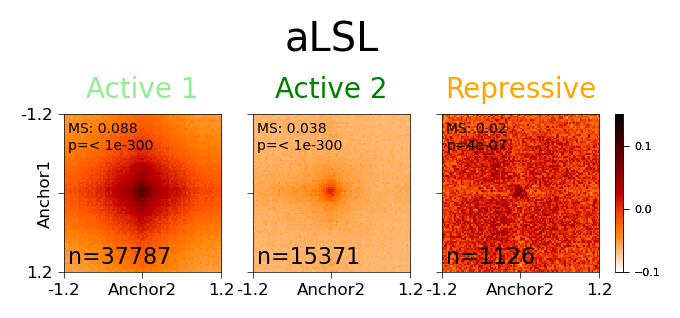

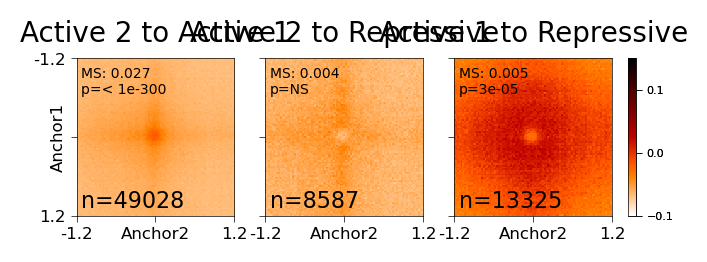

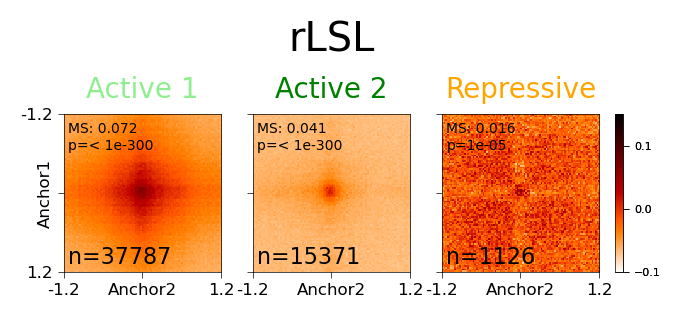

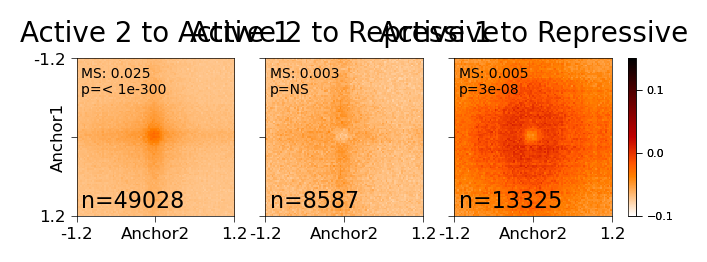

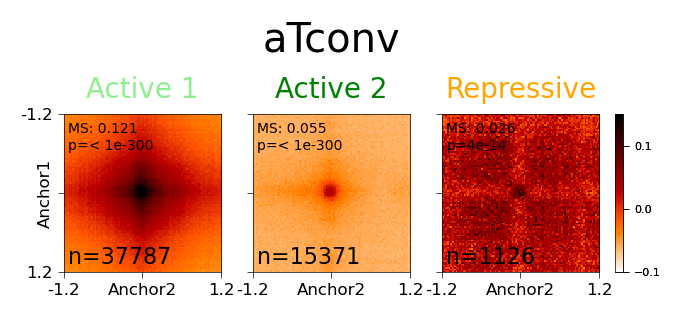

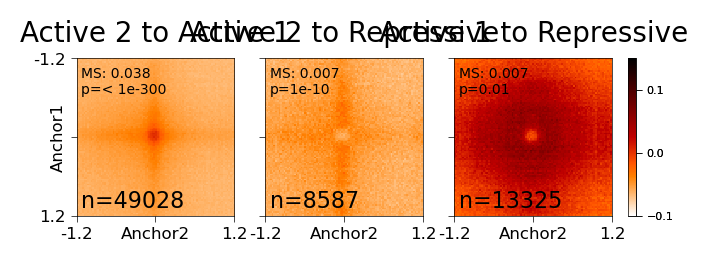

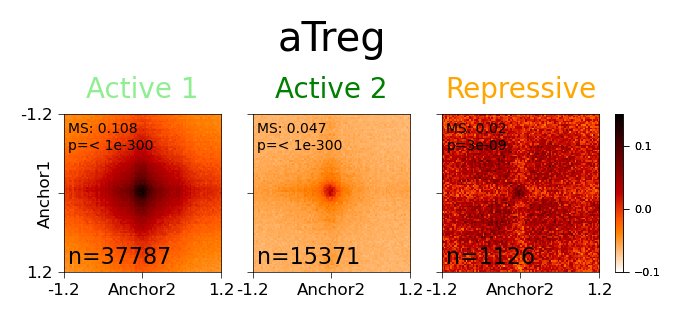

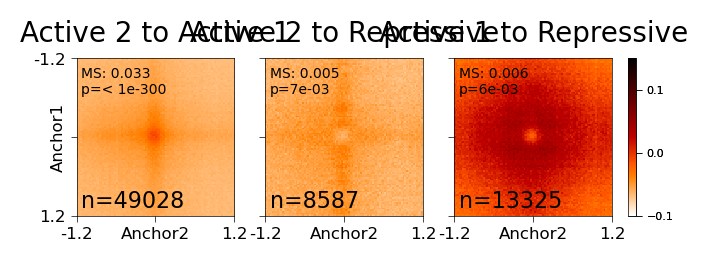

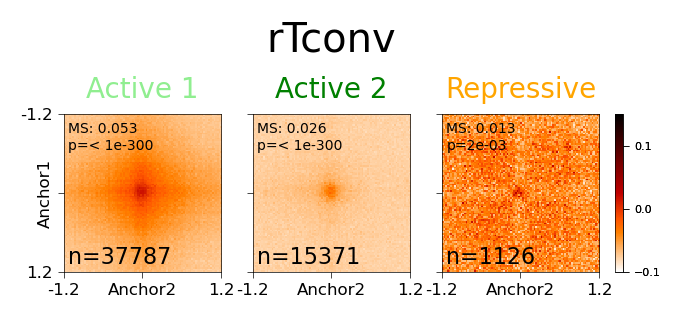

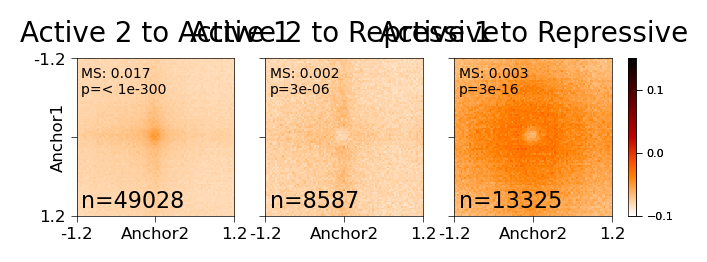

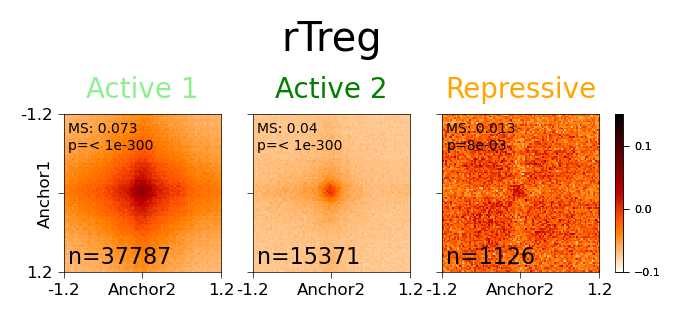

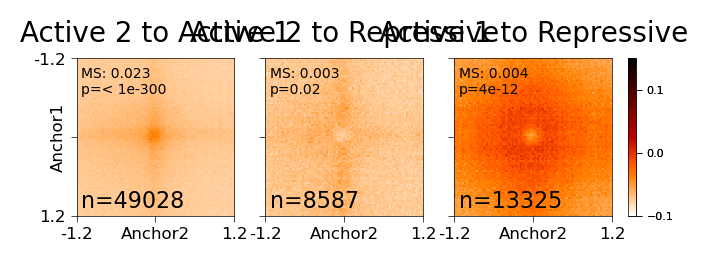

In [23]:
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = [.15, .15, .15, .15, .15, .15],
                                     vmin = [-.1, -.1, -.1, -.1, -.1, -.1],
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 5,
                                     center = 5, center_method='None',
                                    )    
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_all.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

In [19]:
from aux_functions import format_pval_as_asterisks

def add_stat_annotation(ax, data, xcol, ycol, hue, order, hue_order, box_pairs, ymax=.32, delta = .15, d = 0, 
                       offset_d=.25):
    """ Add statistical annotations for comparing hue within each x."""
    unique_x = data[xcol].unique()
    hue_levels = data[hue].unique()
    
    # Prepare a mapping from hue and x to x-tick positions
    hue_offsets = {hue: (i-1)*offset_d for i, hue in enumerate(hue_order)}
    print(hue_offsets)
    x_positions = {v: k for k, v in enumerate(order)}

    seen = set()
    for pair in box_pairs:
        if pair[0][0] not in seen:
            seen.add(pair[0][0])
            yoff = 0 
        else:
            yoff += delta
        # Filter data for each pair

        data1 = data[(data[xcol] == pair[0][0]) & (data[hue] == pair[0][1])]
        data2 = data[(data[xcol] == pair[1][0]) & (data[hue] == pair[1][1])]
        
        # Perform rank sum test
        stat, p_value = scipy.stats.ranksums(data1[ycol], data2[ycol])
    
        # Find positions for annotations
        x1 = x_positions[pair[0][0]] + hue_offsets[pair[0][1]] - d
        x2 = x_positions[pair[1][0]] + hue_offsets[pair[1][1]] - d

        y, h, col = ymax + 0.02, 0.01, 'k'

        y = y * (1 + yoff)
        # Draw the lines and annotations
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=.2, c=col)
        ax.text((x1 + x2) * .5, y + h, f'{format_pval_as_asterisks(p_value)}', ha='center', va='bottom', color=col,
               fontsize=4)

In [21]:
inter_all_mat_dict.keys()

dict_keys(['aLSL', 'rLSL', 'aTconv', 'aTreg', 'rTconv', 'rTreg'])

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


{'rTconv': -0.2, 'rTreg': 0.0, 'aTconv': 0.2, 'aTreg': 0.4}


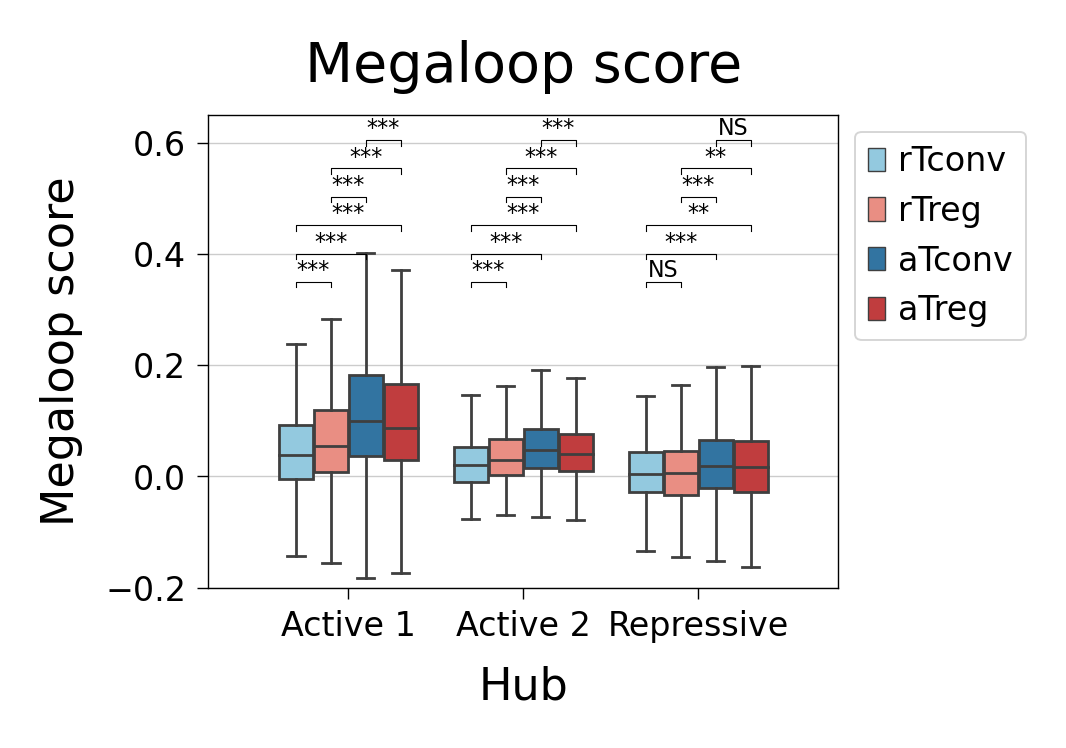

In [24]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rTreg', 'aTconv', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'salmon', 'tab:blue', 'tab:red'])
plt.ylim([-.2, .65])
plt.gca().set_axisbelow(True)
add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
                   d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
fig.savefig('./plots/active_rest_pileup/quantification.pdf', bbox_inches = 'tight')

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


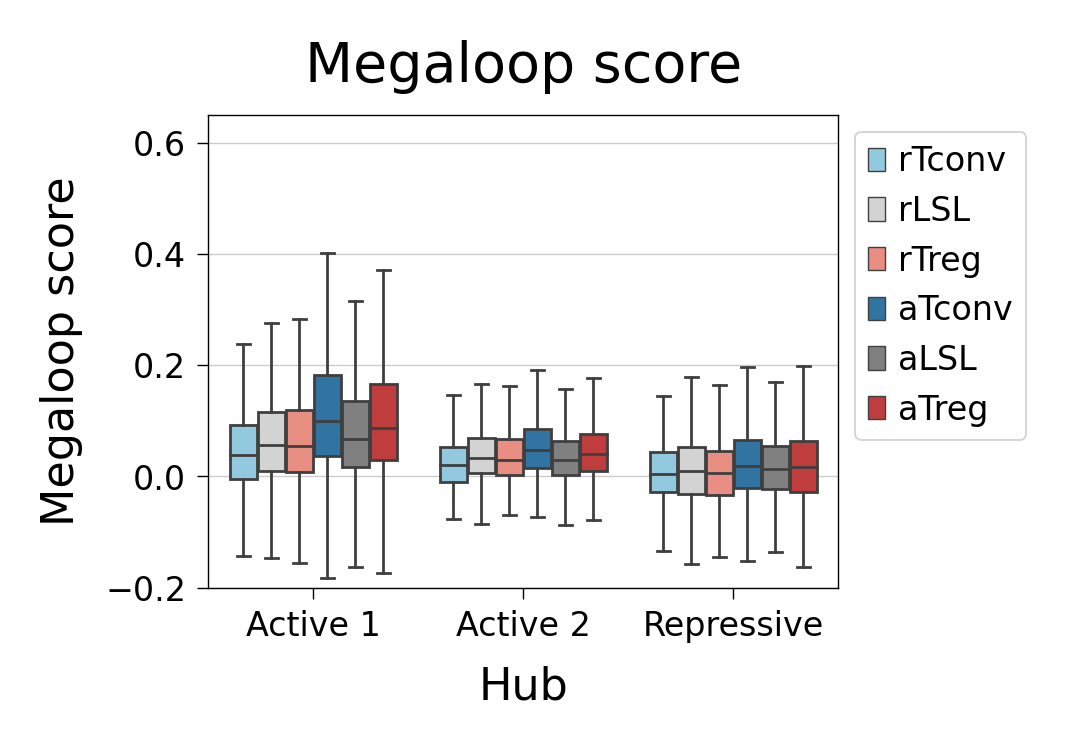

In [27]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rLSL', 'rTreg', 'aTconv', 'aLSL', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'lightgray', 'salmon', 'tab:blue', 'gray', 'tab:red'])
plt.ylim([-.2, .65])
plt.gca().set_axisbelow(True)
# add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
#                    d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
fig.savefig('./plots/active_rest_pileup/quantification.pdf', bbox_inches = 'tight')

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


{'rTconv': -0.2, 'rTreg': 0.0, 'aTconv': 0.2, 'aTreg': 0.4}


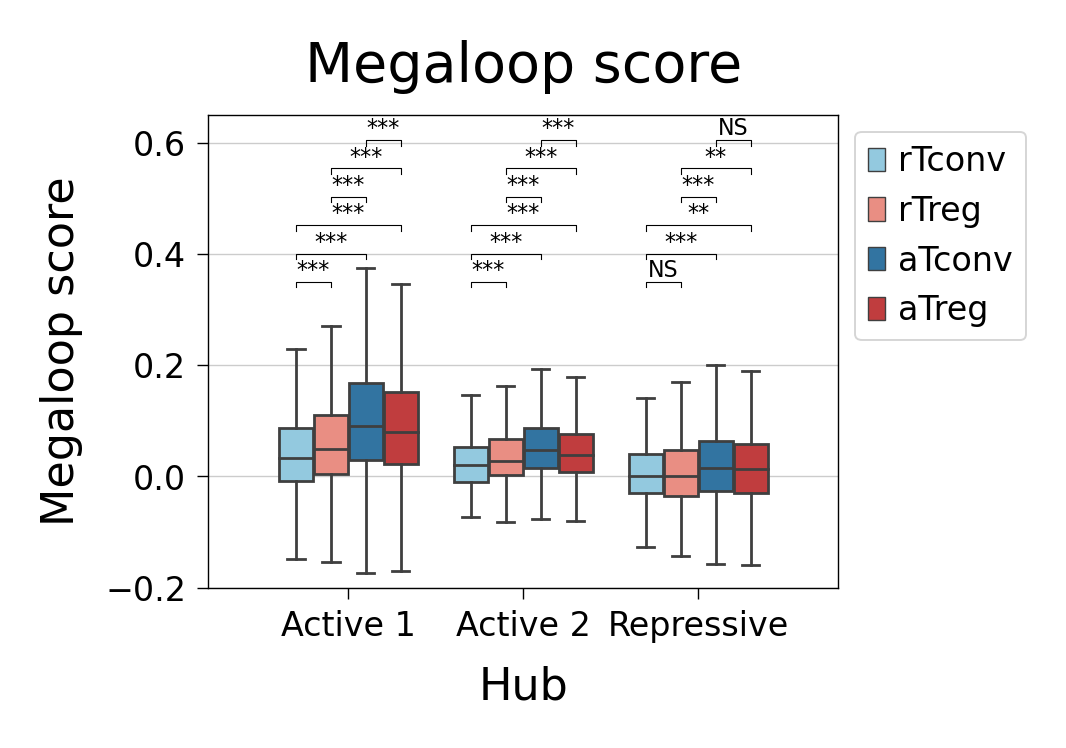

In [98]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rTreg', 'aTconv', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'salmon', 'tab:blue', 'tab:red'])
plt.ylim([-.2, .65])
plt.gca().set_axisbelow(True)
add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
                   d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
fig.savefig('./plots/active_rest_pileup/quantification.pdf', bbox_inches = 'tight')

In [35]:
(inter_all_metadata['ind2']==278).sum()

493

In [ ]:
newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster, fig_between_cluster), results = plot_cluster_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = [.15, .15, .15, .15, .15, .15],
                                     vmin = [-.1, -.1, -.1, -.1, -.1, -.1],
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 5,
                                     center = 5,
                                    )    
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_all.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

In [4]:
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster), results = plot_ind_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     278,
                                     res = 25_000,
                                     vmax = .2,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 1,
                                     center = 5,
                                    )    
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_ikzf2.pdf', bbox_inches='tight')
    all_results_dicts[key] = results


NameError: name 'inter_all_metadata' is not defined

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


{'rTconv': -0.2, 'rTreg': 0.0, 'aTconv': 0.2, 'aTreg': 0.4}


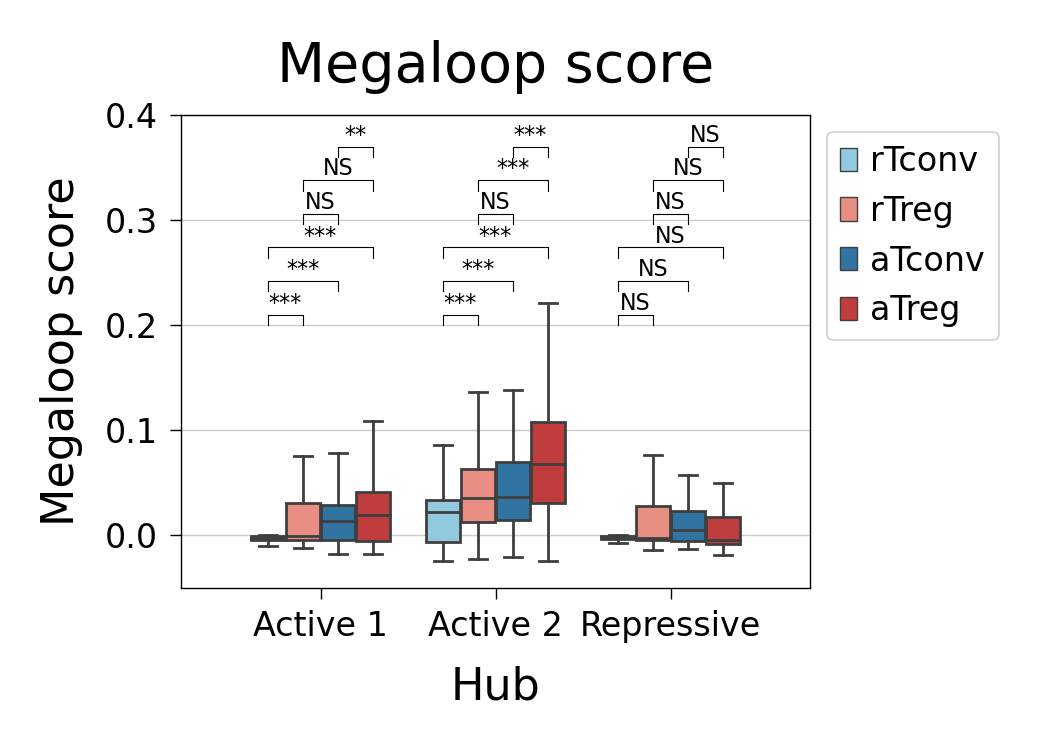

In [101]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rTreg', 'aTconv', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'salmon', 'tab:blue', 'tab:red'])
plt.ylim([-.05, .4])
plt.gca().set_axisbelow(True)
add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
                   ymax=.18, delta=.16,
                   d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
fig.savefig('./plots/active_rest_pileup/ikzf2_quantification.pdf', bbox_inches = 'tight')

### Full Ikzf2

In [ ]:
%autoreload 2
from hub_pileup import *
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in inter_all_mat_dict:
    (fig_within_cluster), results = plot_ind_pileups_from_result(key, inter_all_mat_dict, inter_all_metadata,
                                     inter_all_metadata['cluster1'].unique(),
                                     278,
                                     res = 25_000,
                                     vmax = .2,
                                     vmin = -.05,
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict,
                                     s1 = 1,
                                     center = 5,
                                    )    
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=4, x=1.7, ha='center')
    # fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_ikzf2.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Megaloop score')

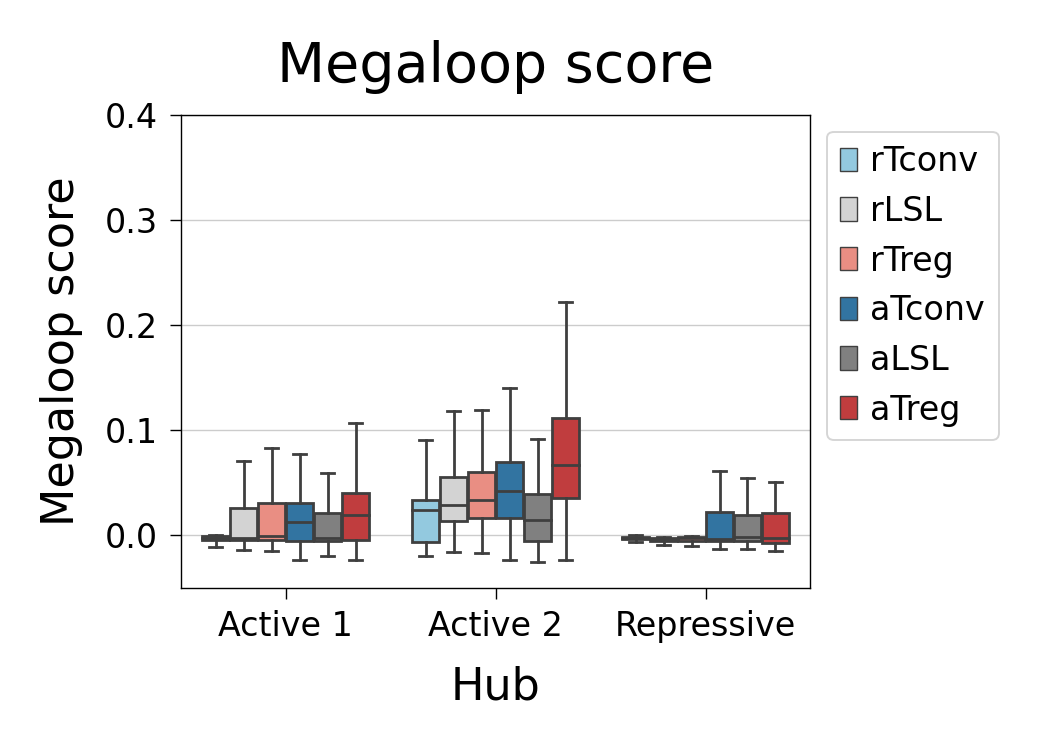

In [35]:
from itertools import combinations

all_datas = []
for u in [0, 4, 18]:
    idx = (inter_all_metadata['cluster1']==u) & (inter_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in inter_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names[u]
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rLSL', 'rTreg', 'aTconv', 'aLSL', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'lightgray', 'salmon', 'tab:blue', 'gray', 'tab:red'])

plt.ylim([-.05, .4])
plt.gca().set_axisbelow(True)
# add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
#                    ymax=.18, delta=.16,
#                    d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
# fig.savefig('./plots/active_rest_pileup/ikzf2_quantification.pdf', bbox_inches = 'tight')

#### Look at intra megaloops for Ikzf2

In [72]:
bins_with_ikzf2_megaloop = np.where(inter_and_intra_connections_treg[278, :782]+inter_and_intra_connections_tcon[278, :782] >0)[0]
df1 = pd.DataFrame(columns = ['ind', 'cluster', 'chrom'])
df1['ind'] = bins_with_ikzf2_megaloop
df1['cluster'] = 'intra'
df1['chrom'] = 'chr1'

df2 = df1.copy()
df2['ind'] = 278
df2['cluster'] = 'intra'
df2['chrom'] = 'chr1'

In [123]:
%autoreload 2
from hub_pileup import *
from compute_differential_hic_hub import *
from collections import defaultdict
from make_figure4 import *
import itertools
import cooler

hic_pref = '/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/'
active_rest_hic_dict = {
    'aLSL' : cooler.Cooler(hic_pref + 'aLSL.mcool::/resolutions/50000'),
    'rLSL' : cooler.Cooler(hic_pref + 'rLSL.mcool::/resolutions/50000'),
    'aTconv' : cooler.Cooler(hic_pref + 'aTconv.mcool::/resolutions/50000'),
    'aTreg' : cooler.Cooler(hic_pref + 'aTreg.mcool::/resolutions/50000'),
    'rTconv' : cooler.Cooler(hic_pref + 'rTconv.mcool::/resolutions/50000'),
    'rTreg' : cooler.Cooler(hic_pref + 'rTreg.mcool::/resolutions/50000'),
}

from collections import defaultdict
from make_figure4 import *
from hub_pileup import *
import itertools

megaloop_pileup_cooldict = cooldict_50kb
padding_size = 20

ikzf2_all_mat_dict, ikzf2_all_metadata = pileup_direct_bin_pairs(df1, df2, active_rest_hic_dict, 
                                                              {'chr' + x : y for x, y in chrom_to_start.items()}, 
                                                              inter_and_intra_connections_treg, 
                                                              inter_and_intra_connections_tcon, 
                                                              padding_size=padding_size, 
                                                              fetch_oe=True,
                                                              resolution_out = 50_000,
                                                              inter=False,
                                                              intra=True
                                                         )

/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))
/Genomics/pritykinlab/gabe/jupys/tregs/./code/hic_zscore_functions.py:148: RuntimeWarning: Mean of empty slice
  m = np.nanmean(np.diag(balanced_mat, k=off_diag_k))


Done with chr1


1


/Genomics/pritykinlab/gabe/jupys/tregs/./code/hub_pileup.py:345: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_yticklabels([-cutoff, "Anchor1", cutoff])


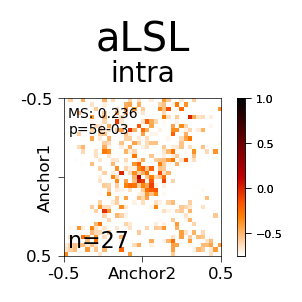

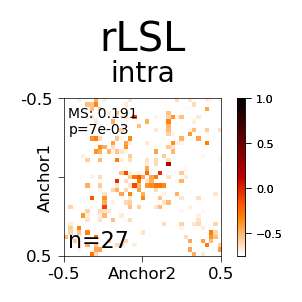

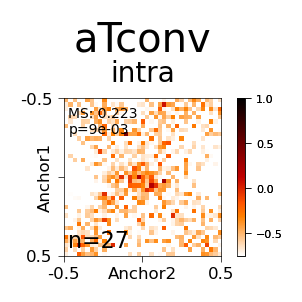

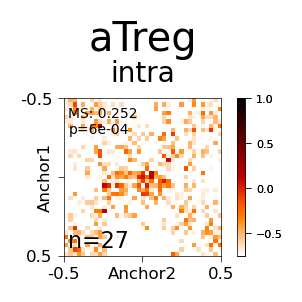

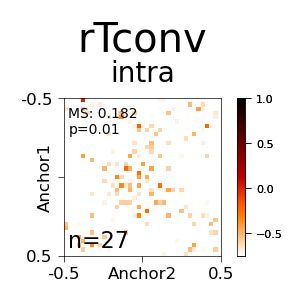

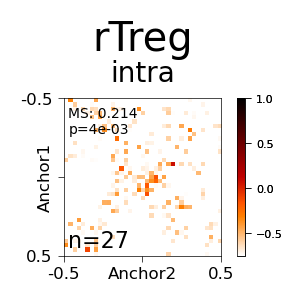

In [152]:
!mkdir -p plots/active_rest_pileup

newline = '\n'
all_results_dicts = {}
for key in ikzf2_all_mat_dict:
    (fig_within_cluster), results = plot_cluster_pileups_from_result(key, ikzf2_all_mat_dict, ikzf2_all_metadata,
                                     ikzf2_all_metadata['cluster1'].unique(),
                                     res = 25_000,
                                     vmax = [1],
                                     vmin = [-.75],
                                     columns_to_names = columns_to_names,
                                     row_colors_dict = row_colors_dict, s1=1,
                                     center = 5, center_method='None', cross_plot=False,
                                                                     cliplo=-10, cliphigh=10
                                    )    
    fig_within_cluster = fig_within_cluster[0]
    fig_within_cluster.suptitle(f"{key}", y=1.5, x=.5, ha='center')
    fig_within_cluster.savefig(f'./plots/active_rest_pileup/{key}_all.pdf', bbox_inches='tight')
    all_results_dicts[key] = results

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Megaloop score')

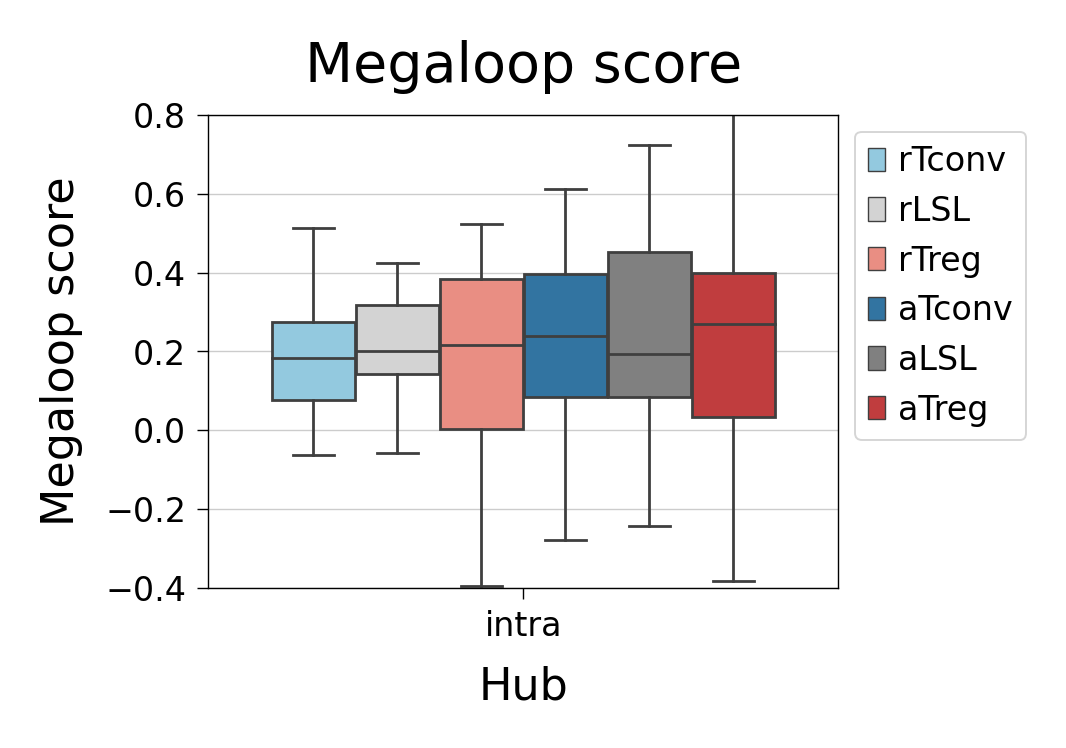

In [153]:
from itertools import combinations

all_datas = []
for u in ['intra']:
    idx = (ikzf2_all_metadata['cluster1']==u) & (ikzf2_all_metadata['cluster2']==u)
    data = pd.DataFrame()
    for key in ikzf2_all_mat_dict:
        difference = all_results_dicts[key][u]['v_middle'] - all_results_dicts[key][u]['v_outside']
        data[key] = difference
    data['cluster'] = columns_to_names.get(u, u)
    all_datas.append(data)

data = pd.concat(all_datas, axis=0)
data = data.melt('cluster')

hue_order = ['rTconv', 'rLSL', 'rTreg', 'aTconv', 'aLSL', 'aTreg']
order = ['Active 1', 'Active 2', 'Repressive']
pairs = [((x, h1), (x, h2)) for x in order for h1, h2 in combinations(hue_order, 2)]

fig, axs = init_subplots_exact(1, 1, fgsz=(40*mm, 30*mm), dpi = 200)
sns.boxplot(data=data, x='cluster', y='value', hue='variable', fliersize=0,
           hue_order = hue_order,
           palette=['skyblue', 'lightgray', 'salmon', 'tab:blue', 'gray', 'tab:red'])

plt.ylim([-.4, .8])
plt.gca().set_axisbelow(True)
# add_stat_annotation(plt.gca(), data, 'cluster', 'value', 'variable', order, hue_order, pairs,
#                    ymax=.18, delta=.16,
#                    d = .1, offset_d = .2)

plt.legend(bbox_to_anchor=(1, 1))
plt.xlabel("Hub")
plt.ylabel("Megaloop score")
plt.title("Megaloop score")
# fig.savefig('./plots/active_rest_pileup/ikzf2_quantification.pdf', bbox_inches = 'tight')